# Projeto Final | Módulo Estatística Computacional em R

**Objetivo:** Elaborar uma análise estatística descritiva e inferencial sobre uma base de dados disponível
no próprio R, aplicando os conceitos aprendidos ao longo do curso.

**Dataset Escolhido:** Iris – medidas de flores


### 1. Introdução:

**Sobre o dataset:** O dataset contém medidas de flores de três espécies de íris:

*   Iris setosa
*   Iris versicolor
*   Iris virginica

Essas espécies têm características físicas parecidas, mas com diferenças sutis. O conjunto de dados possui 150 observações que estão divididas igualmente entre essas três espécies de flores. Para cada uma das 150 flores foram registradas quatro medidas, todas em centímetros:


*  Sepal.Length - Comprimento da Sépala
*  Sepal.Width - Largura da Sépala
*  Petal.Length - Comprimento da Pétala
*  Petal.Width - Largura da Pétala

Esse dataset foi escolhido por ser ideal para nosso estudo, pois permite aplicar todas as técnicas propostas: podemos comparar as médias das medidas entre as espécies (Inferência/ANOVA), ver se as medidas de largura e comprimento e também de pétala e sépala estão relacionadas (Correlação) e até tentar prever o tamanho de uma a partir da outra (Regressão)."






In [ ]:
install.packages("ggplot2") #instalação de bibliotecas
library(ggplot2)

install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 2. Análise Descritiva:

> **"O tamanho médio da pétala é diferente entre as 3 espécies?"**



In [ ]:
data(iris)  #carregamento dos dados do dataset

In [ ]:
head(iris)  #check das primeiras colunas

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
str(iris)  #estrutura dos dados

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
table(iris$Species)  #resumo das observações por especie


    setosa versicolor  virginica 
        50         50         50 

In [ ]:
summary(iris)  #estatisticas descritivas gerais de cada uma das colunas do dataset

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

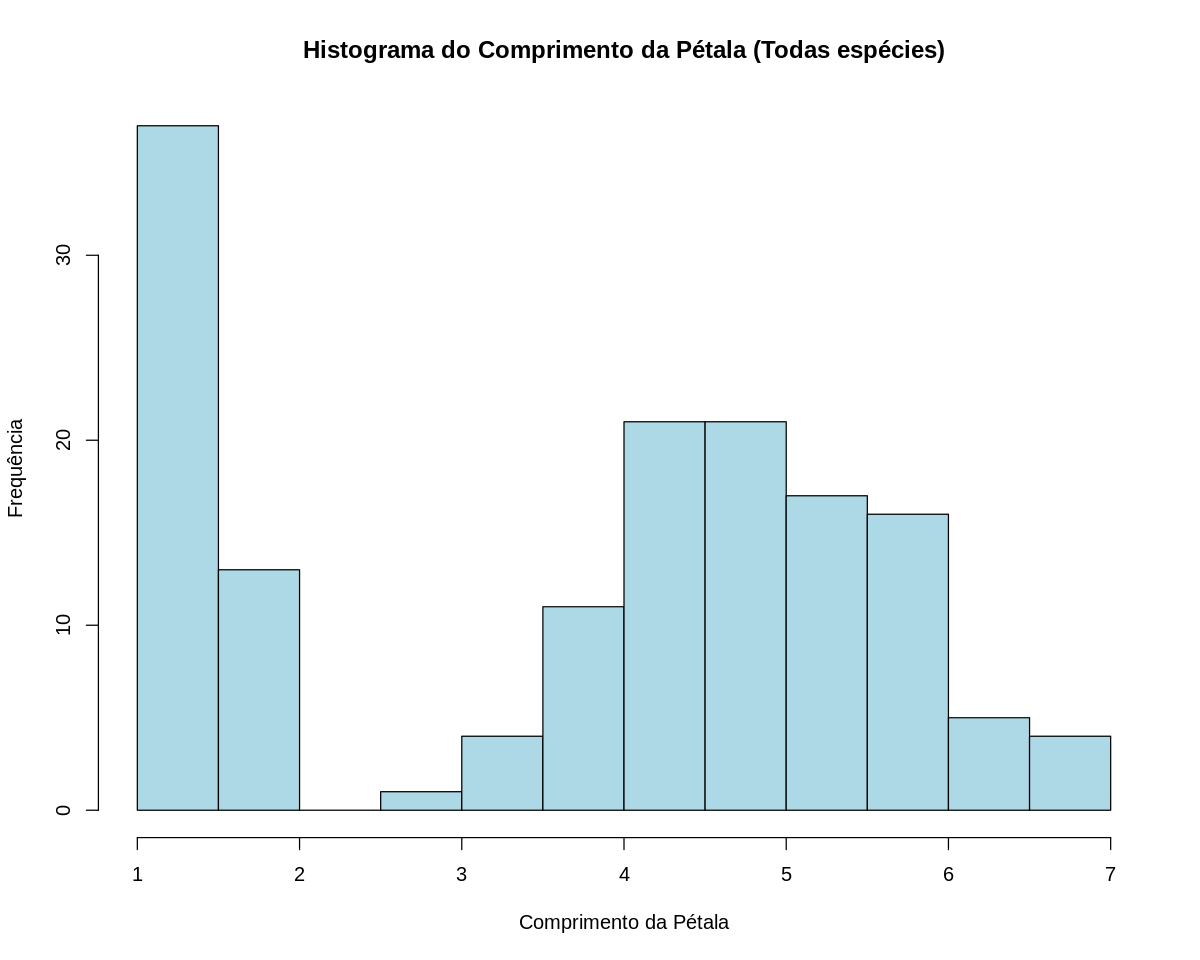

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
#histograma de distribuição com todas as espécies da coluna de comprimento da pétala
hist(iris$Petal.Length, main = "Histograma do Comprimento da Pétala (Todas espécies)", col = "lightblue",
      xlab = "Comprimento da Pétala",
      ylab = "Frequência")

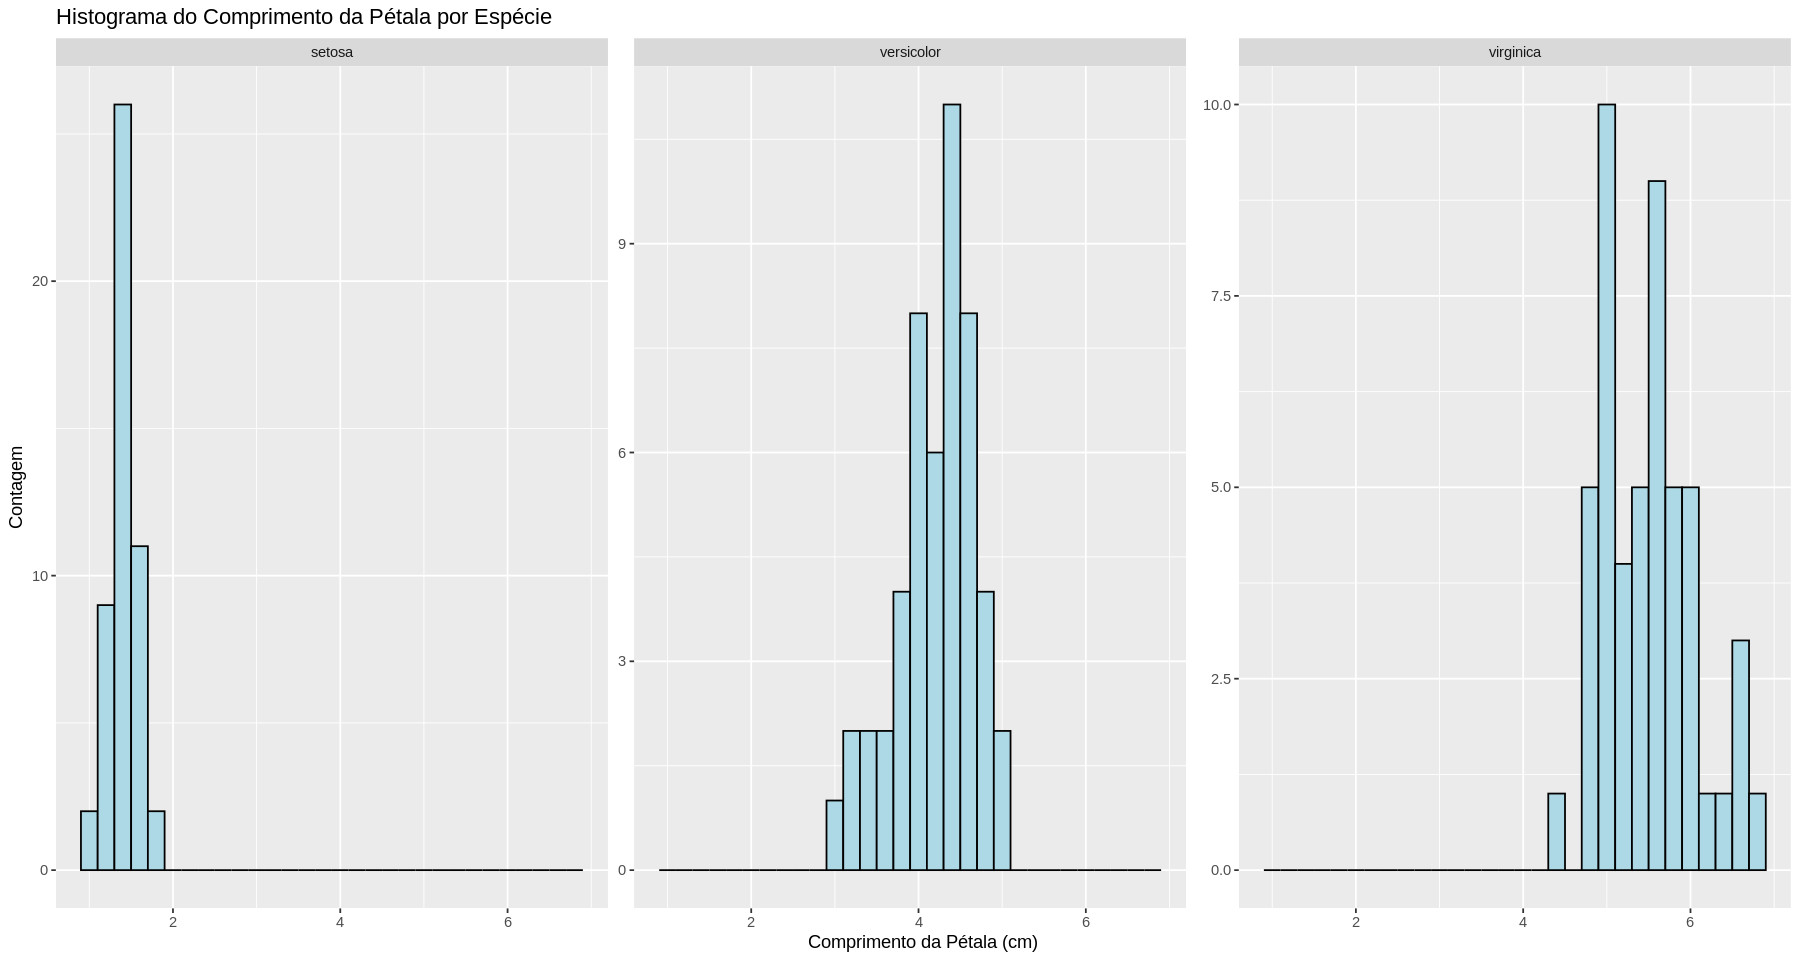

In [ ]:
# Define o tamanho da imagem de saída (em polegadas)
options(repr.plot.width = 15, repr.plot.height = 8)

# histograma de distribuição de cada tipo separada
ggplot(iris, aes(x = Petal.Length)) +
  geom_histogram(binwidth = 0.2, fill = "lightblue", color = "black") +
  facet_wrap(~ Species, scales = "free_y", nrow = 1) + # (nrow = 1 é bom para forçar a linha única)
  ggtitle("Histograma do Comprimento da Pétala por Espécie") +
  xlab("Comprimento da Pétala (cm)") +
  ylab("Contagem")

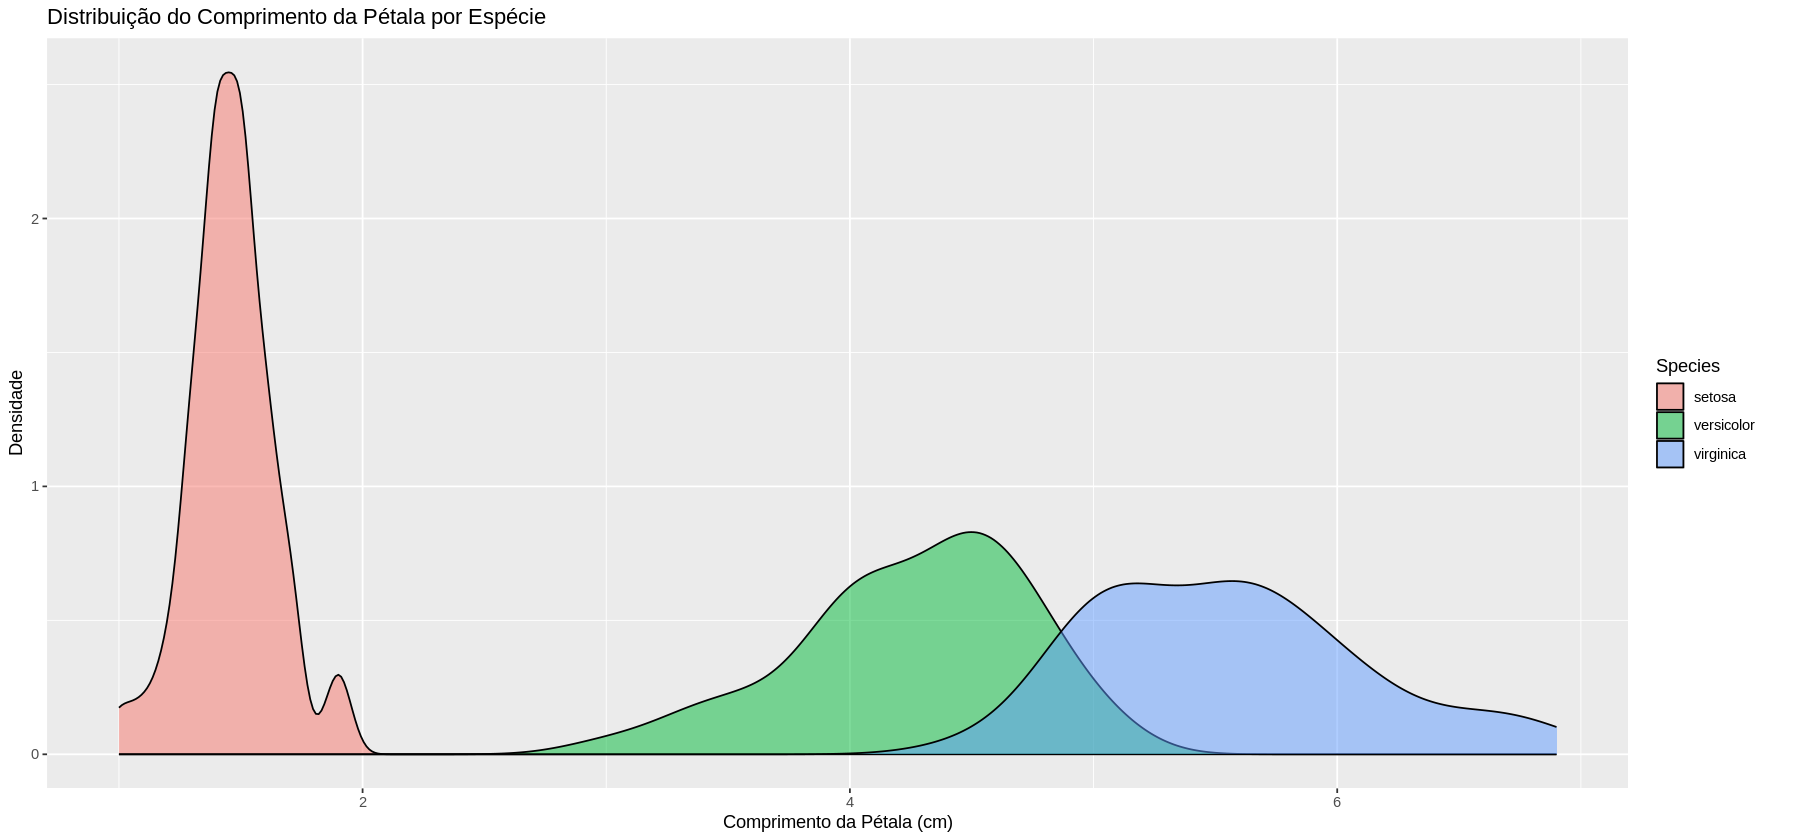

In [ ]:
#grafico de todos as
ggplot(iris, aes(x = Petal.Length, fill = Species)) +
  geom_density(alpha = 0.5) + # alpha = transparência
  ggtitle("Distribuição do Comprimento da Pétala por Espécie") +
  xlab("Comprimento da Pétala (cm)") +
  ylab("Densidade")

In [ ]:
aggregate(Petal.Length ~ Species, data = iris, FUN = mean)  #média do comprimento da pétala por espécie

Species,Petal.Length
<fct>,<dbl>
setosa,1.462
versicolor,4.260
virginica,5.552


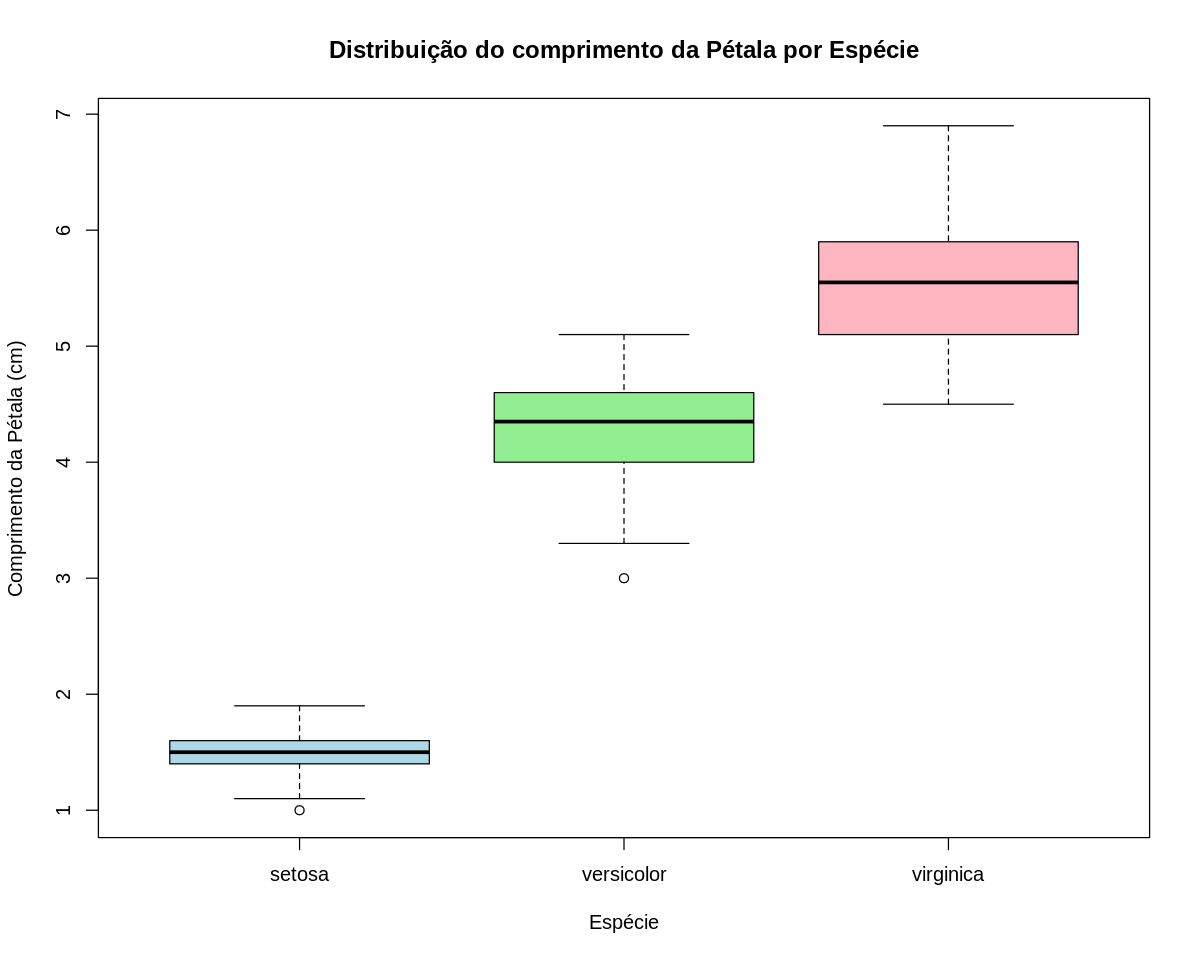

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(Petal.Length ~ Species, data = iris,  #box plot
        main = "Distribuição do comprimento da Pétala por Espécie",
        xlab = "Espécie", ylab = "Comprimento da Pétala (cm)",
        col = c("lightblue", "lightgreen", "lightpink"))

Aqui já é possível observar que as médias de comprimento entre os diferentes tipos de flores é bem diferente.

Considerando as médias encontradas e os gráficos plotados é possível notar que existe uma diferença entre da média e os comprimento nas diferentes classes de flores, mas para afirmar isso serão aplicados os testes estatisticos para identificar se essa diferença é real.

3. Inferência Estatística:

> Com um IC de 95% é possível afirmar que a média do comprimento da pétala é estatisticamente diferente entre os 3 grupos de flores?



Para fazer inferências sobre as médias de diferentes grupos é o utilizado o método ANOVA, de "análise de variância". Se a variância entre os grupos for significativamente maior do que a variância dentro dos grupos, as médias são consideradadas diferentes. Sendo assim a ANOVA trás que:

$H$0 : $\mu_{setosa}=\mu_{versicolor}=\mu_{virginica}$

$H$1: Pelo menos uma média é diferente.


A ANOVA assume que os dados de cada grupo seguem uma distribuição normal então, então primeiramente serão aplicados os testes de normalidade entre os diferentes grupos:


$H_0$: *Os dados seguem uma distribuição normal.*

$H_1$: *Os dados NÃO seguem uma distribuição normal.*

In [ ]:
setosa_cp = iris$Petal.Length[iris$Species == "setosa"] #separando os grupos de flores
versicolor_cp = iris$Petal.Length[iris$Species == "versicolor"]
virginica_cp = iris$Petal.Length[iris$Species == "virginica"]

In [ ]:
teste_setosa <- shapiro.test(setosa_cp)  #rodando o teste de normalidade para cada uma das amostras separadas
teste_versicolor <- shapiro.test(versicolor_cp)
teste_virginica <- shapiro.test(virginica_cp)

print("Teste de Normalidade - Shapiro Wilk")
print(paste("Setosa p-valor: ", teste_setosa$p.value))
print(paste("Versicolor p-valor: ", teste_versicolor$p.value))
print(paste("Virginica p-valor: ", teste_virginica$p.value))

[1] "Teste de Normalidade - Shapiro Wilk"
[1] "Setosa p-valor:  0.0548114671464096"
[1] "Versicolor p-valor:  0.158477838348024"
[1] "Virginica p-valor:  0.109775369487196"


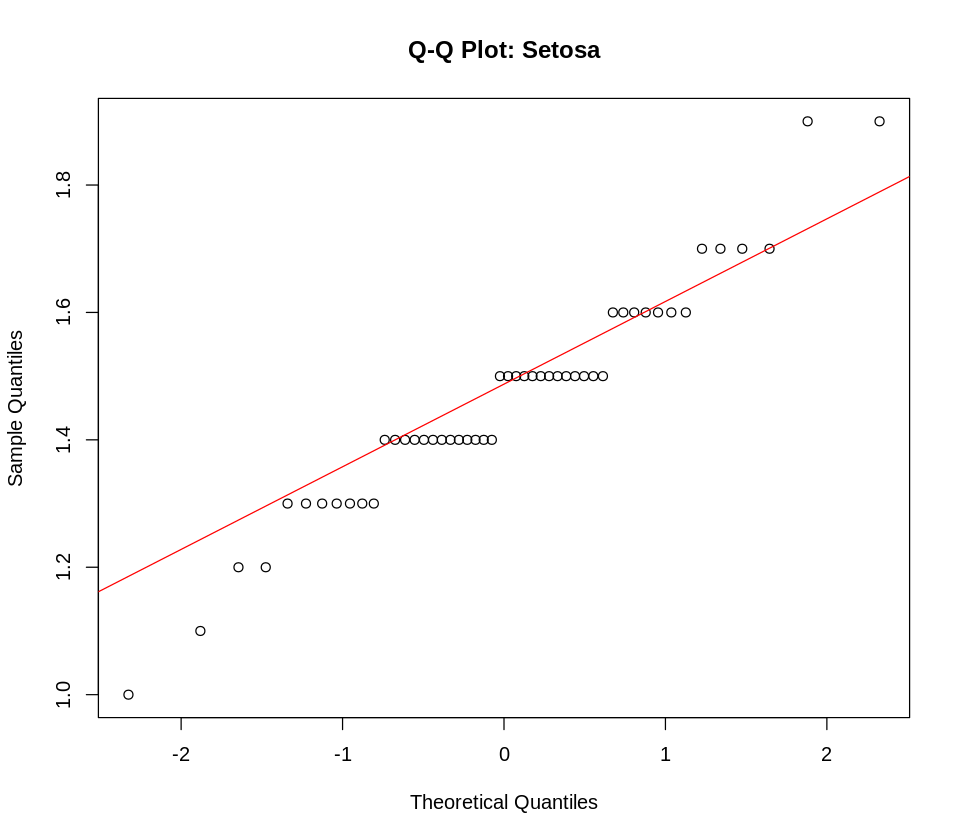

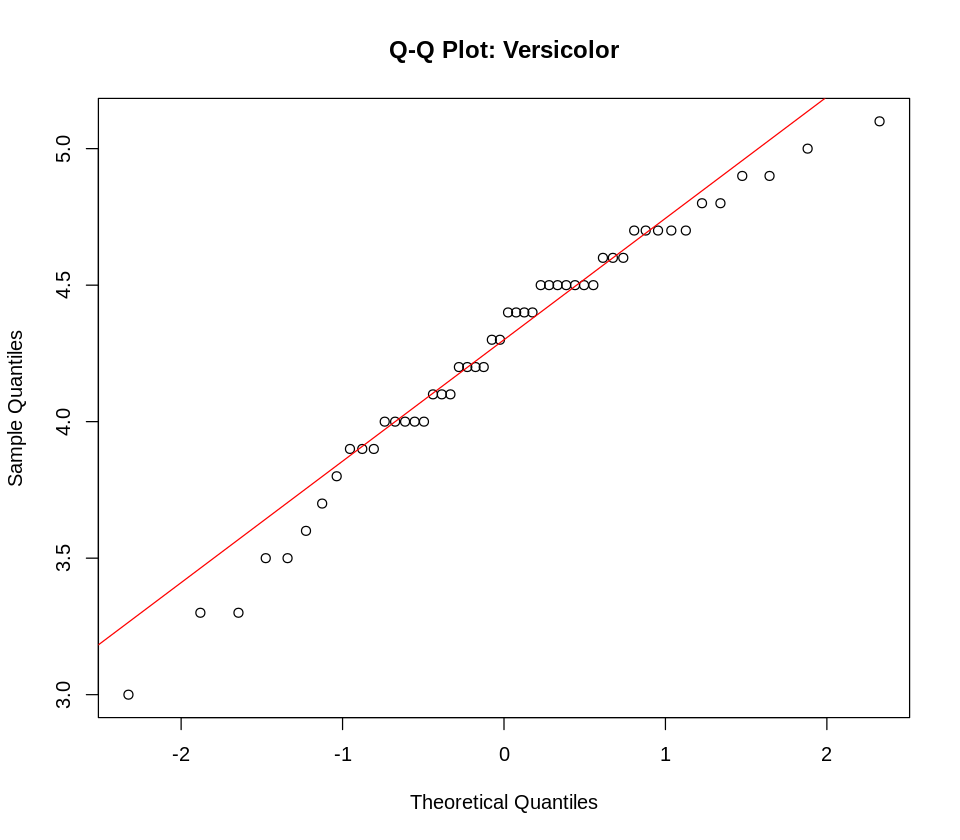

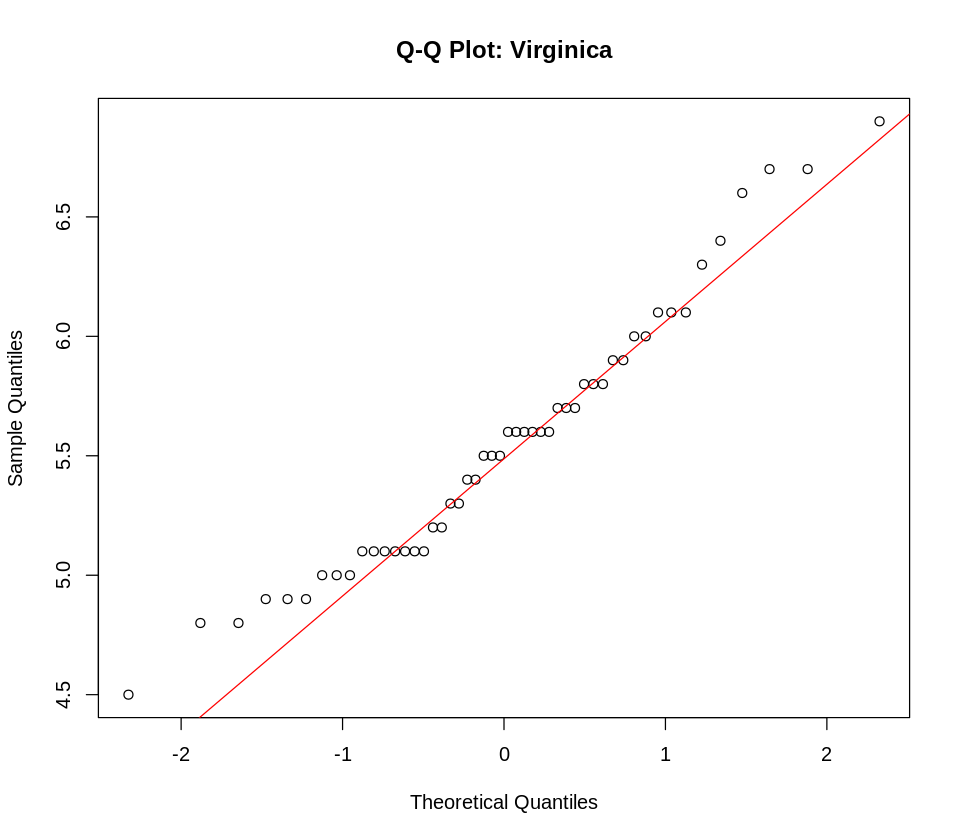

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)

qqnorm(setosa_cp, main = "Q-Q Plot: Setosa")  #gráfico da distribuição dos dados em comparativo com a reta normal
qqline(setosa_cp, col = "red")

qqnorm(versicolor_cp, main = "Q-Q Plot: Versicolor")
qqline(versicolor_cp, col = "red")

qqnorm(virginica_cp, main = "Q-Q Plot: Virginica")
qqline(virginica_cp, col = "red")

Como os p-valores do teste de Shapiro Wilk mostram o p-valor > 0.05, e como é possível obsevar nos gráficos o comportamento dos dados, podemos assumir que os dados de cada grupo seguem uma distribuição normal, satisfazendo a premissa da ANOVA.

Outra premissa da ANOVA é o teste de Homogeneidade das Variâncias (variâncias semelhantes entre grupos), pra isso é aplicado o teste de Bartlett sendo:

$H$0:*todas as variâncias dos grupos são iguais.*

$H$1:*pelo menos uma das variâncias é diferente.*


In [ ]:
# Teste de Homogeneidade das Variâncias
bartlett.test(Petal.Length ~ Species, data = iris)


	Bartlett test of homogeneity of variances

data:  Petal.Length by Species
Bartlett's K-squared = 55.423, df = 2, p-value = 9.229e-13


O p-valor = 9.229e-13 é um valor muito menor do que 0,05 dessa forma rejeitamos a H0 considerando que as variâncias entre as espécies não são homogêneas.

Nesse caso, ao inves de utilizar a ANOVA clássica é utilizado o Teste de Welch (ou ANOVA de Welch), que é uma versão da ANOVA que não exige variâncias iguais.

In [ ]:
teste_welch <- oneway.test(Petal.Length ~ Species, data = iris)  #Teste da ANOVA de Welch
print(teste_welch)


	One-way analysis of means (not assuming equal variances)

data:  Petal.Length and Species
F = 1828.1, num df = 2.000, denom df = 78.073, p-value < 2.2e-16



O resultado da ANOVA de Welch (p-valor < 2.2e-16) é muito menor que 0.05. Portanto, mesmo considerando as variâncias diferentes, rejeitamos a hipótese nula e concluímos que existe uma diferença estatisticamente significante no comprimento da pétala entre as espécies.

4. Análise de Correlação


>**Será que flores com pétalas mais compridas também tendem a ter pétalas mais largas? E qual a relação entre o comprimento das pétalas e das sépalas? E de suas larguras?**



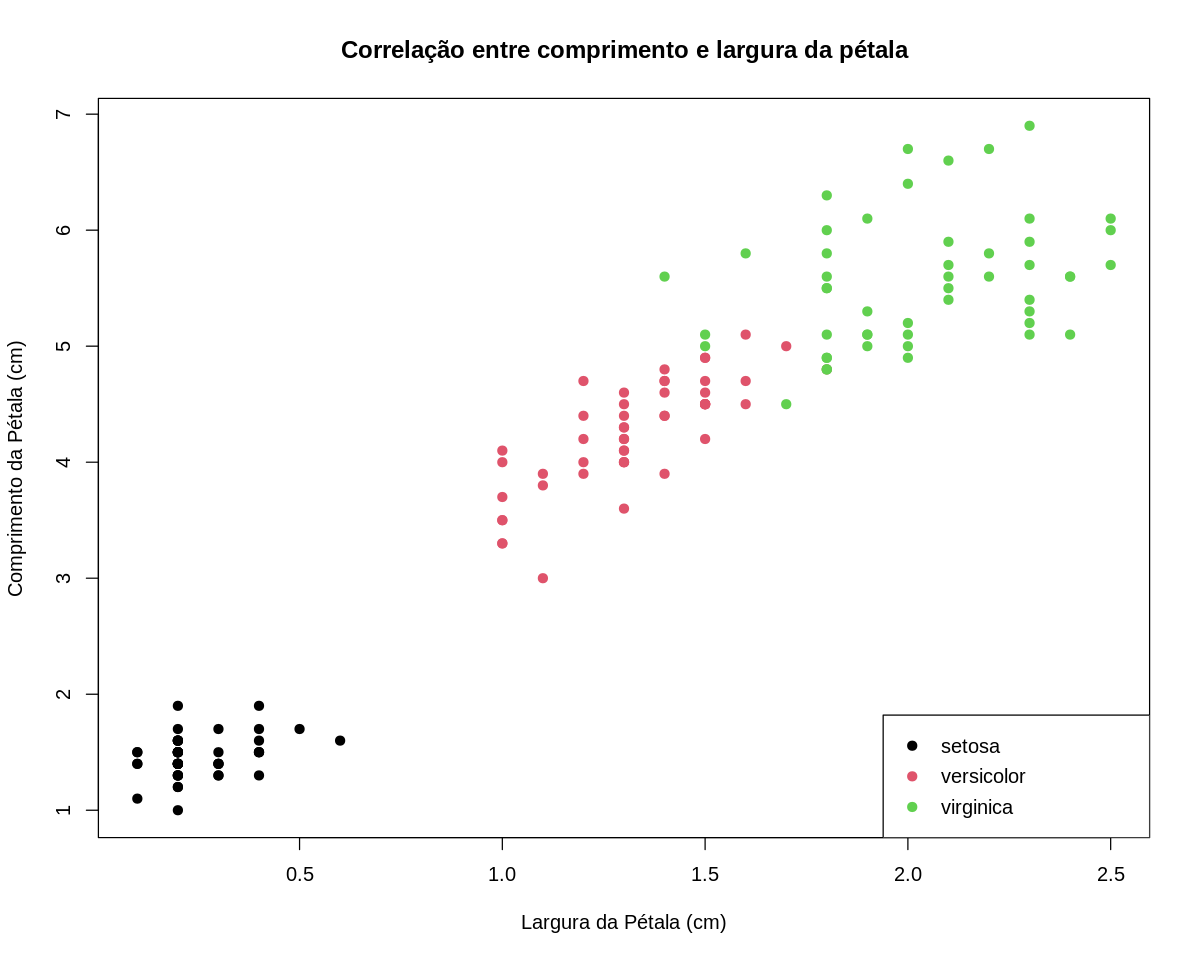

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(Petal.Length ~ Petal.Width, data = iris,   #grafico de correlação entre largura e comprimento das petalas das tres especies
     main = "Correlação entre comprimento e largura da pétala",
     xlab = "Largura da Pétala (cm)", ylab = "Comprimento da Pétala (cm)",
     pch = 19, # Tipo de ponto
     col = iris$Species)

legend("bottomright",
       legend = levels(iris$Species),
       col = 1:3,
       pch = 19)

In [ ]:
df_numerico <- iris[,1:4]   #matriz de correlação numérica

matriz_correlacao <- cor(df_numerico)
print(matriz_correlacao)

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411  -0.3661259    0.9628654   1.0000000


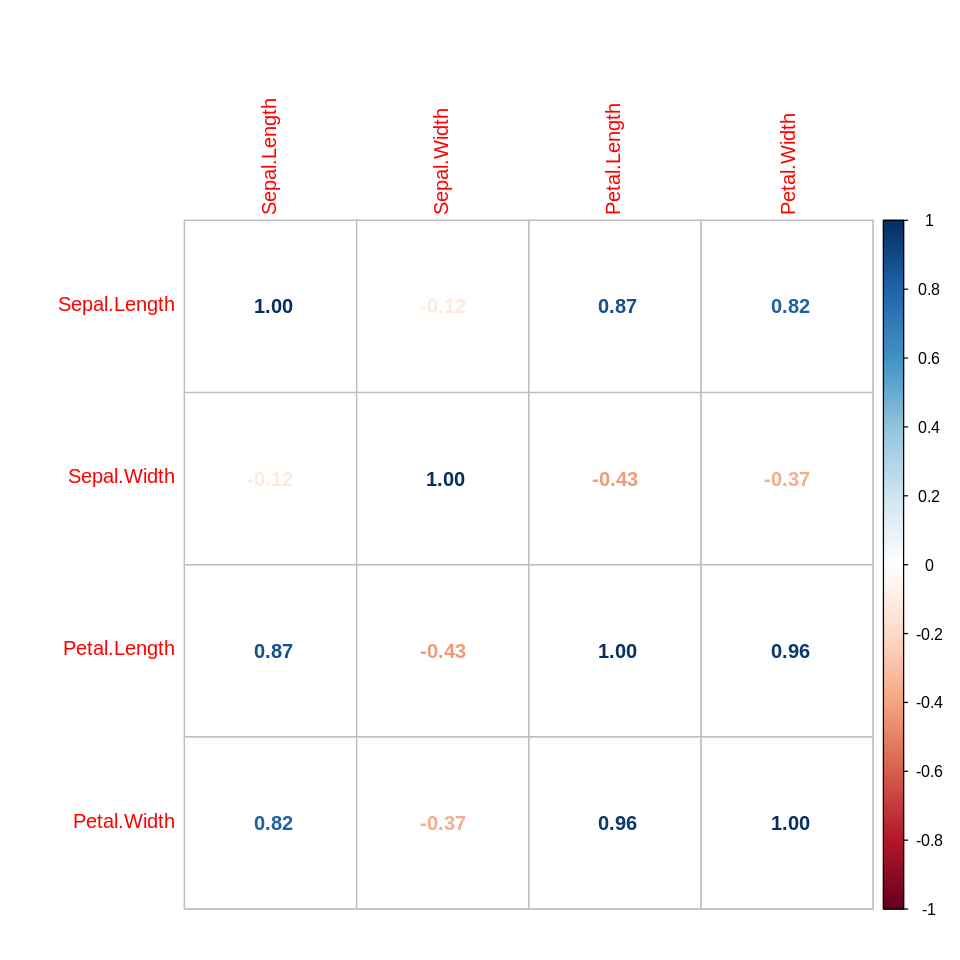

In [ ]:
options(repr.plot.width = 8, repr.plot.height =8)
corrplot(matriz_correlacao, method = "number")  #matriz de correlação com cores

Comprimento vs Largura da Pétala: A matriz de correlação mostra um coeficiente de Pearson de 0.963 entre Petal.Length e Petal.Width. Este valor é muito próximo de +1, indicando uma correlação positiva extremamente forte entre as duas variáveis. Isso confirma o que o gráfico de dispersão sugere: flores com pétalas mais compridas quase sempre têm pétalas mais largas.

Pétala vs. Sépala (Comprimento): A correlação entre Petal.Length (Pétala) e Sepal.Length (Sépala) é 0.8717. É uma correlação positiva muito forte. (Flores com pétalas longas tendem a ter sépalas longas).

Pétala vs. Sépala (Largura): A correlação entre Petal.Length (Pétala) e Sepal.Width (Sépala) é -0.4284. É uma correlação negativa moderada. (Flores com pétalas longas tendem a ter sépalas mais estreitas).

In [ ]:
library(dplyr)

correlacoes_segmentadas <- iris %>%
  # 1. Agrupa o dataset pela coluna Species
  group_by(Species) %>%
  # 2. Para cada grupo, calcula as correlações
  summarise(
    # Correlação Petal.Length vs Petal.Width (A mais forte)
    Cor_Petal_PL_PW = cor(Petal.Length, Petal.Width),
    # Correlação Petal.Length vs Sepal.Length (A segunda mais forte)
    Cor_P_S_PL_SL   = cor(Petal.Length, Sepal.Length),
    # Correlação Sepal.Length vs Sepal.Width (A negativa)
    Cor_Sepal_SL_SW = cor(Sepal.Length, Sepal.Width)
  )

# Exibindo o resultado
print(correlacoes_segmentadas)

5. Modelo de Regressão



> Criação do modelo de Regressão para a partir de uma largura de pétala, descobrirmos o comprimento dela.




In [ ]:
modelo_regressao <- lm(Petal.Width ~ Petal.Length, data = iris)  #modelo de regressão entre comprimento e largura da pétala
summary(modelo_regressao)


Call:
lm(formula = Petal.Width ~ Petal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56515 -0.12358 -0.01898  0.13288  0.64272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.363076   0.039762  -9.131  4.7e-16 ***
Petal.Length  0.415755   0.009582  43.387  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2065 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


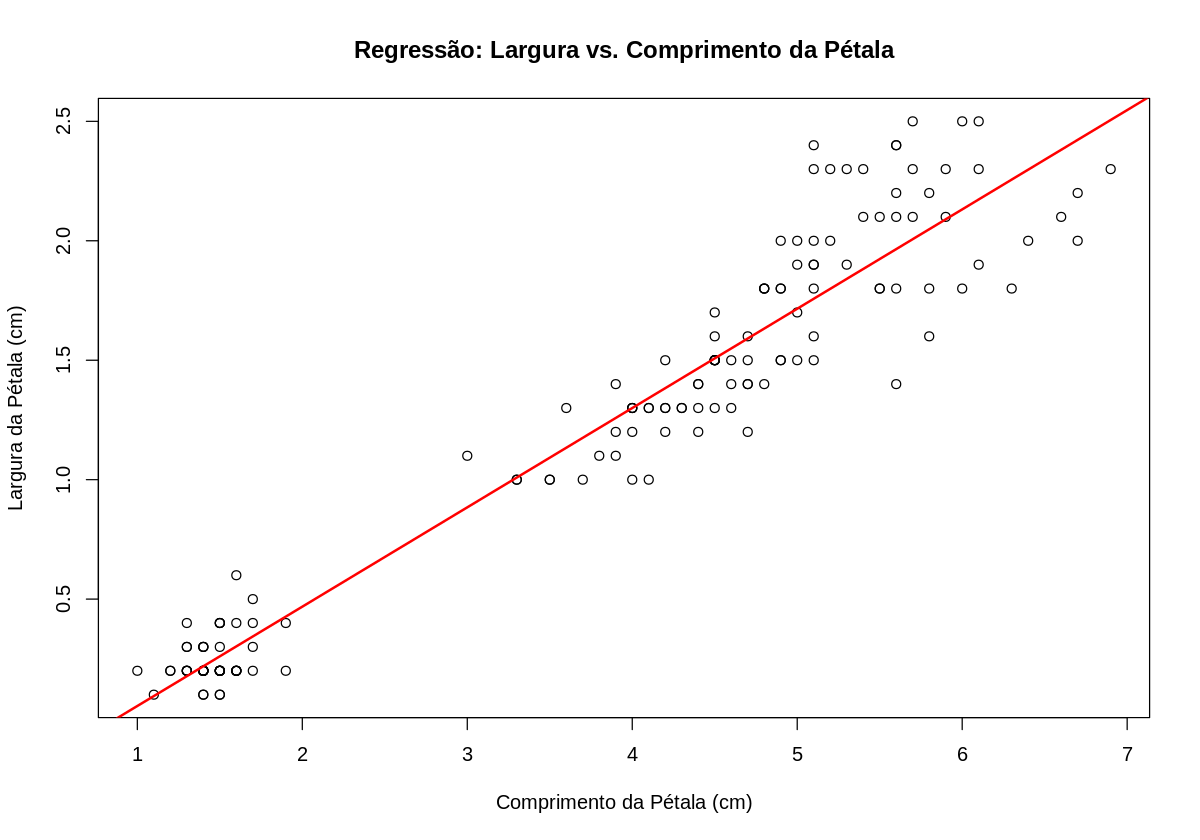

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)
#grafico de dispersão
plot(Petal.Width ~ Petal.Length, data = iris,
     main = "Regressão: Largura vs. Comprimento da Pétala",
     xlab = "Comprimento da Pétala (cm)", ylab = "Largura da Pétala (cm)")

#linha do modelo de regressão
abline(modelo_regressao, col = "red", lwd = 2) # lwd = espessura da linha

Esse modelo de regressão gerou um R² de 0.9271, o que indica que 92,7% da largura de uma pétala pode ser explicada pelo seu comprimento, um excelente valor que mostra que o modelo se ajusta muito bem aos dados, como é possível ver no gráfico acima.

O p-valor < 2.2e-16 também indica que o comprimento da pétala é um previsor válido para descobrirmos a largura da pétala.

É possível observar também o coeficiente de 0.41575, que nos indica que a cada 1cm de aumento no comprimento da pétala é esperado um aumento de 0.416cm em sua largura.




---

